In [56]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow import keras

In [3]:
nm_trn = pd.read_csv('d:\\Test task\\digit-recognizer\\train.csv')

In [4]:
nm_trn.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    nm_trn.iloc[:,1:]/255, nm_trn.iloc[:,0], test_size=0.2, random_state=1)

In [6]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y_train.head()

21278    1
26861    3
12484    2
38717    6
3917     3
Name: label, dtype: int64

In [108]:
#X_train.iloc[0,:].values.reshape(28,28)

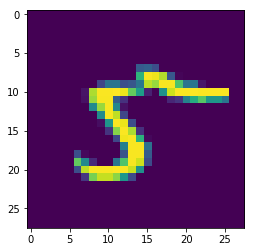

In [109]:
plt.figure()
plt.imshow(X_train.iloc[152,:].values.reshape(28,28))
#plt.colorbar()
plt.grid(False)
plt.show()

In [104]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [105]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
model.fit(X_train.values, y_train.values, epochs=13)

Epoch 1/13
33600/33600 [==============================] - 2s 60us/sample - loss: 0.3224 - acc: 0.90830s - loss: 0.3
Epoch 2/13
33600/33600 [==============================] - 2s 54us/sample - loss: 0.1455 - acc: 0.9564
Epoch 3/13
33600/33600 [==============================] - 2s 53us/sample - loss: 0.1001 - acc: 0.9698
Epoch 4/13
33600/33600 [==============================] - 2s 53us/sample - loss: 0.0743 - acc: 0.9780
Epoch 5/13
33600/33600 [==============================] - 2s 56us/sample - loss: 0.0564 - acc: 0.98271s - loss:  - ETA: 0s - loss: 0.054
Epoch 6/13
33600/33600 [==============================] - 2s 54us/sample - loss: 0.0447 - acc: 0.9862
Epoch 7/13
33600/33600 [==============================] - 2s 54us/sample - loss: 0.0336 - acc: 0.9904
Epoch 8/13
33600/33600 [==============================] - 2s 54us/sample - loss: 0.0266 - acc: 0.99230s - loss: 0
Epoch 9/13
33600/33600 [==============================] - 2s 54us/sample - loss: 0.0208 - acc: 0.99400s - loss: 
Epoch 10/1

In [107]:
test_loss, test_acc = model.evaluate(X_test, y_test)

8400/8400 [==============================] - 0s 30us/sample - loss: 0.1077 - acc: 0.9727


In [16]:
print('Точность после проверки:', test_acc)

Точность после проверки: 0.9709524


In [17]:
predictions = model.predict(X_test)

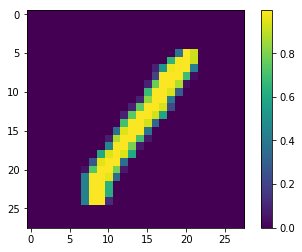

In [50]:
plt.figure()
plt.imshow(X_test.iloc[0,:].values.reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [49]:
np.argmax(predictions[0])

1

In [47]:
pred = np.array([])
for i in range(0, len(predictions)):
    pred = np.append(pred, np.argmax(predictions[i]))

In [67]:
nums = [ i for i in range(0,10)]
nums

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [68]:
cfm = confusion_matrix(
    y_test,
    pred,
    labels = nums
)

In [86]:
cfm_err = cfm
for i in nums:
    cfm[i,i] = 0

cfm_err

array([[ 0,  0,  5,  2,  0,  1,  6,  1,  1,  1],
       [ 0,  0,  5,  4,  0,  0,  0,  1,  0,  2],
       [ 1,  1,  0,  2,  0,  0,  2,  6,  5,  0],
       [ 1,  0, 12,  0,  1,  3,  1,  2,  3,  4],
       [ 1,  0,  1,  0,  0,  0,  2,  3,  0,  7],
       [ 4,  2,  2, 17,  2,  0, 11,  1,  8,  2],
       [ 4,  0,  1,  0,  2,  0,  0,  0,  1,  1],
       [ 0,  2,  6,  0,  5,  0,  0,  0,  2,  9],
       [ 3,  9,  2,  3,  5,  2,  3,  2,  0, 11],
       [ 2,  0,  0,  4, 19,  2,  0,  6,  2,  0]], dtype=int64)

Text(33.0, 0.5, 'Actual')

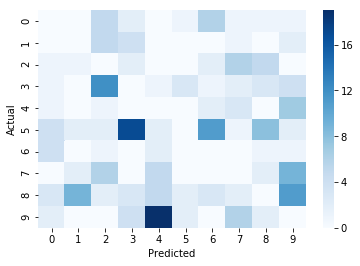

In [98]:
sns.heatmap(cfm_err,
            cmap=plt.cm.Blues
           )

plt.xlabel('Predicted')
plt.ylabel('Actual') 